In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('weather_classification_data.csv')

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [7]:
ohe=OneHotEncoder()
le=LabelEncoder()

In [8]:
df['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [9]:
df['Cloud Cover']=le.fit_transform(df['Cloud Cover'])
df['Season']=le.fit_transform(df['Season'])
df['Location']=le.fit_transform(df['Location'])
df['Weather Type']=le.fit_transform(df['Weather Type'])

In [10]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [11]:
df_=df.drop(columns='Weather Type')
features=df_.columns
w_type=df['Weather Type']

In [12]:
df_

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1


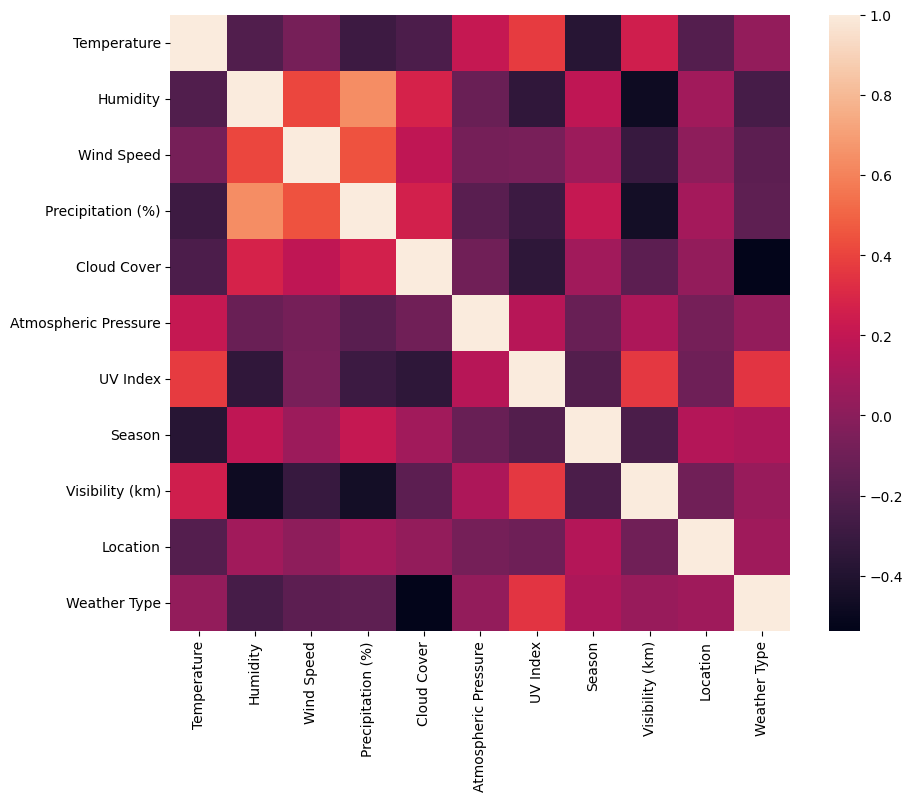

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.savefig('correlation_heatmap.png')

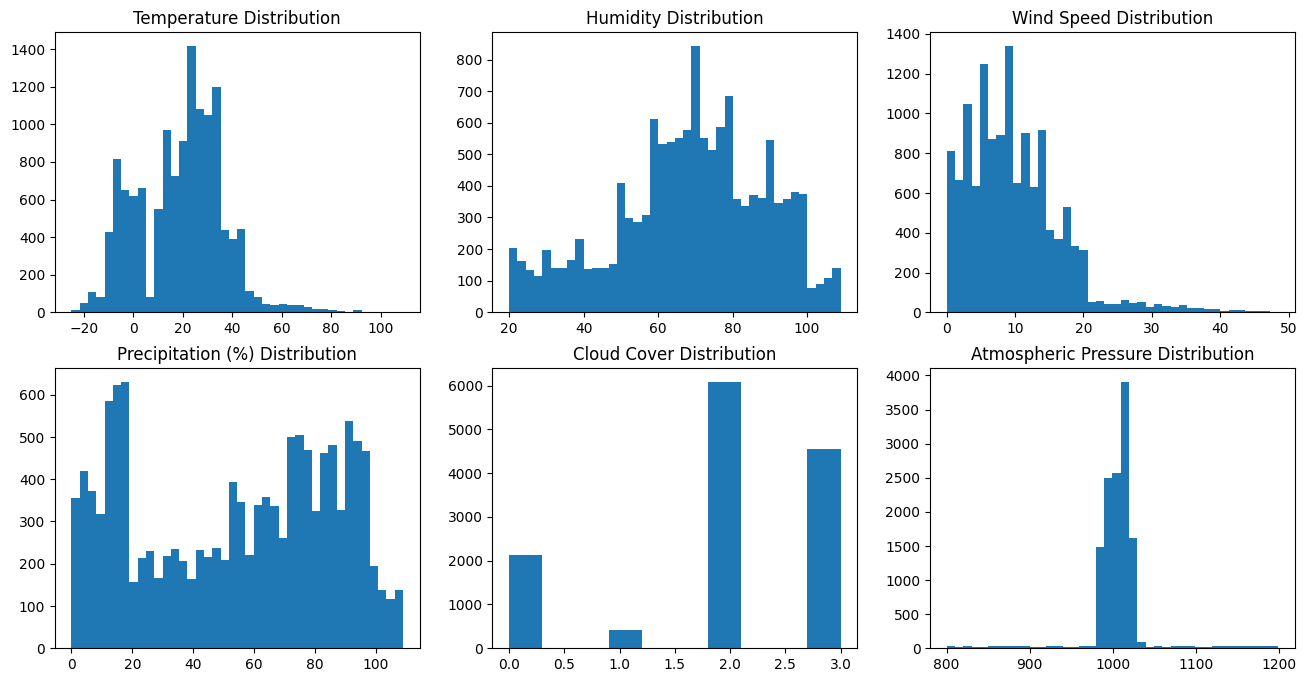

In [14]:
fig1, axes1 = plt.subplots(2,3,figsize=(16,8))
ax1 = axes1[0][0]
ax2 = axes1[0][1]
ax3 = axes1[0][2]
ax4 = axes1[1][0]
ax5 = axes1[1][1]
ax6 = axes1[1][2]


ax1.hist(df['Temperature'], bins=40)
ax1.set_title('Temperature Distribution')

ax2.hist(df['Humidity'], bins=40)
ax2.set_title('Humidity Distribution')


ax3.hist(df['Wind Speed'], bins=40)
ax3.set_title('Wind Speed Distribution')


ax4.hist(df['Precipitation (%)'], bins=40)
ax4.set_title('Precipitation (%) Distribution')


ax5.hist(df['Cloud Cover'])
ax5.set_title('Cloud Cover Distribution')



ax6.hist(df['Atmospheric Pressure'], bins=40)
ax6.set_title('Atmospheric Pressure Distribution')
fig1.savefig('feature_distribution_1.png', dpi=1200)

<Axes: xlabel='Location'>

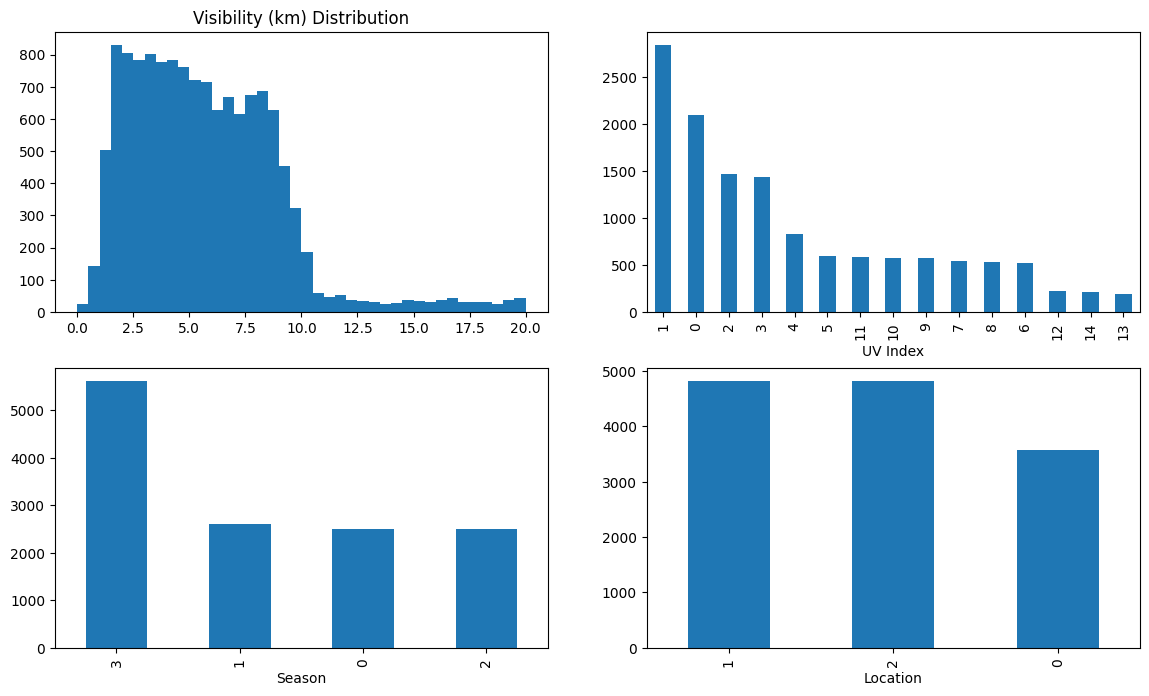

In [15]:

fig2,axes2=plt.subplots(2,2,figsize=(14,8))

ax1=axes2[0][0]
ax2=axes2[0][1]
ax3=axes2[1][0]
ax4=axes2[1][1]


ax1.set_title('Visibility (km) Distribution')
ax1.hist(df['Visibility (km)'], bins=40)
df['UV Index'].value_counts().plot(kind='bar',ax=ax2)
df['Season'].value_counts().plot(kind='bar',ax=ax3)
df['Location'].value_counts().plot(kind='bar',ax=ax4)


In [16]:
data1=df['UV Index'].value_counts()
data1

UV Index
1     2837
0     2097
2     1465
3     1432
4      831
5      591
11     582
10     577
9      572
7      543
8      532
6      524
12     218
14     210
13     189
Name: count, dtype: int64

In [17]:
from sklearn.decomposition import PCA

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df_ = df.drop(columns='Weather Type')
X = np.array(df_)
y = np.array(df['Weather Type'])

scaler=StandardScaler()
X_std=scaler.fit_transform(X)

# PCA
pca = PCA(n_components='mle')
pca.fit(X_std)
X_pca = pca.transform(X)

pd.DataFrame(X_pca).head

<bound method NDFrame.head of                 0           1          2           3           4           5  \
0     -115.508445  285.337717   2.938314  937.283511 -117.857924  117.170779   
1     -123.458957  301.622157   1.203125  937.488765 -112.568602  112.982924   
2     -158.184841  275.474342   9.576539  945.982045 -115.739798  113.030059   
3     -125.994680  301.723015   0.009161  951.364908 -118.573081  108.494376   
4     -119.811238  286.113062   1.465607  918.663299 -112.702375  113.189243   
...           ...         ...        ...         ...         ...         ...   
13195 -114.896315  281.736575   2.501647  930.789630 -116.446996  116.113484   
13196 -148.238609  274.736188  13.923858  992.995721 -128.038649  122.078363   
13197 -147.400322  280.276542  11.149373  940.274483 -114.837314  111.878100   
13198  -99.680778  277.807583   0.992682  912.947874 -116.669786  114.448487   
13199 -128.062949  266.368531   6.341282  938.877803 -118.837433  125.172823   

         

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=3407)

In [22]:
scaler1=StandardScaler()

In [23]:
X_train=scaler1.fit_transform(X_train)
X_test=scaler1.transform(X_test)

In [24]:
import random

In [25]:
random_seed=0
random.seed(random_seed)
np.random.seed(random_seed)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [27]:
def list_models():
    models = {
        'SVM_rbf': SVC(C=10, gamma=0.1, random_state=0),  
        'SVM_poly': SVC(C=10, gamma=0.1, kernel='poly'), 
        'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', C=0.1,random_state=0),
        'Random Forest': RandomForestClassifier(n_estimators=300, random_state=3407),  # Bagging
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=300, learning_rate=0.2, random_state=0)  
    }
    return models

In [28]:
def train_and_evaluate_baselines(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"Classification Report for {name}:\n")
        print(classification_report(y_test, y_pred, digits=4))
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(f"Weighted F1 Score for {name}: {f1:.4f}\n")

In [29]:
models = list_models()
train_and_evaluate_baselines(models, X_train, X_test, y_train, y_test)

Classification Report for SVM_rbf:

              precision    recall  f1-score   support

           0     0.8775    0.8992    0.8882       645
           1     0.9015    0.9002    0.9008       651
           2     0.9394    0.9191    0.9291       692
           3     0.9172    0.9172    0.9172       652

    accuracy                         0.9091      2640
   macro avg     0.9089    0.9089    0.9088      2640
weighted avg     0.9095    0.9091    0.9092      2640

Accuracy for SVM_rbf: 0.9091
Weighted F1 Score for SVM_rbf: 0.9092

Classification Report for SVM_poly:

              precision    recall  f1-score   support

           0     0.8311    0.8465    0.8387       645
           1     0.8282    0.9032    0.8641       651
           2     0.9489    0.9118    0.9300       692
           3     0.9293    0.8666    0.8968       652

    accuracy                         0.8826      2640
   macro avg     0.8843    0.8820    0.8824      2640
weighted avg     0.8855    0.8826    0.8832 

# LSTM and GRU

In [48]:
timesteps = 1

def create_sequences(X,y,timesteps=1):
    X_seq,y_seq=[],[]
    for i in range(len(X) - timesteps + 1):
        X_seq.append(X[i:i+timesteps])
        y_seq.append(y[i+timesteps-1])
    return np.array(X_seq), np.array(y_seq)

X_seq,y_seq=create_sequences(X_pca,y,timesteps)

X_train_rnn,X_test_rnn,y_train_rnn,y_test_rnn=train_test_split(X_seq, y_seq, test_size=0.2, random_state=random_seed, shuffle=True)

scaler_train=StandardScaler()

X_train_flat=X_train_rnn.reshape(-1, X_train_rnn.shape[-1])
X_test_flat=X_test_rnn.reshape(-1, X_test_rnn.shape[-1])

X_train_std=scaler_train.fit_transform(X_train_flat).reshape(X_train_rnn.shape)
X_test_std=scaler_train.transform(X_test_flat).reshape(X_test_rnn.shape)

X_train_reshaped=X_train_std
X_test_reshaped=X_test_std
print(X_train_reshaped.shape, X_test_reshaped.shape)

(10560, 1, 9) (2640, 1, 9)


In [50]:
X_train_rnn.shape

(10560, 1, 9)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
num_classes = len(np.unique(y))

def lstm_model(units=50,dropout_rate=0.2,learning_rate=0.001):
    model=Sequential()
    model.add(Input(shape=(timesteps,X_train.shape[1])))
    model.add(Bidirectional(LSTM(units=units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer=Adam(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

In [57]:

lstm_param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0001],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150],
}

In [65]:
n_iter_search=20
def sample_parameters(param_grid, n_iter):
    sampled_params=[]
    keys=list(param_grid.keys())
    for _ in range(n_iter):
        params = {key: random.choice(param_grid[key]) for key in keys}
        sampled_params.append(params)
        print(params)
    return sampled_params

lstm_param_samples=sample_parameters(lstm_param_grid, n_iter_search)

{'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 150}
{'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 150}
{'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 50}
{'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 50}
{'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 100}
{'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100}
{'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 150}
{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 50}
{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 150}
{'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 100}


In [64]:
best_lstm_f1=0
best_lstm_params=None
best_lstm_model=None

for params in lstm_param_samples:
    print(f"\nParameter Combination :{params}")
    lstm_ =lstm_model(
        units=params['units'],
        dropout_rate=params['dropout_rate'],
        learning_rate=params['learning_rate']
    )
    early_stopping=EarlyStopping(monitor='val_loss',patience=20)
    lstm_.fit(
        X_train_reshaped, y_train_rnn,
        validation_split=0.1,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stopping],
        verbose=0,
    )
    val_loss, val_accuracy = lstm_.evaluate(X_train_reshaped, y_train_rnn, verbose=0)
    print(f"Accuracy on Train Set: {val_accuracy:.4f}")

    y_pred_lstm = lstm_.predict(X_test_reshaped)
    y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)
    f1 = f1_score(y_test_rnn,y_pred_classes_lstm,average='weighted')
    print(f"F1 Score on Test Set: {f1:.4f}")
    if f1 > best_lstm_f1:
        best_lstm_f1 = f1
        best_lstm_params = params
        best_lstm_model = lstm_
print("\nLSTM random search completed.")
print(f"Best LSTM params: {best_lstm_params}")
print(f"Best F1 Score on Test Set: {best_lstm_f1:.4f}")


Parameter Combination :{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 150}
Accuracy on Train Set: 0.9256
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
F1 Score on Test Set: 0.9208

Parameter Combination :{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 100}
Accuracy on Train Set: 0.8973
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
F1 Score on Test Set: 0.9023

Parameter Combination :{'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 50}
Accuracy on Train Set: 0.8907
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
F1 Score on Test Set: 0.8955

Parameter Combination :{'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 150}
Accuracy on Train Set: 0.9084
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
F1 Score on Test Set: 0.9080

Parameter Combination :{'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 50}
Accuracy on Train Set: 

In [72]:
def gru_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(timesteps, X_train.shape[1])))
    model.add(GRU(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

In [74]:
gru_param_grid={
    'units': [50,100],
    'dropout_rate': [0.2,0.3],
    'learning_rate': [0.001,0.0001],
    'batch_size': [16,32,64],
    'epochs': [50,100,150],
}

In [76]:
gru_param_samples = sample_parameters(gru_param_grid, n_iter_search)

{'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 100}
{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 150}
{'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 50}
{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 50}
{'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 50}
{'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 150}
{'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 100}
{'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 100}
{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 100}
{'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 100}


In [68]:
 n_iter_search=10

In [87]:
best_gru_f1=0
best_gru_params=None
best_gru_model=None

In [91]:
for params in gru_param_samples:
    print(f"\nParameter Combination :{params}")
    gru_ =gru_model(
        units=params['units'],
        dropout_rate=params['dropout_rate'],
        learning_rate=params['learning_rate']
    )
    early_stopping=EarlyStopping(monitor='val_loss',patience=20)
    gru_.fit(
        X_train_reshaped, y_train_rnn,
        validation_split=0.1,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stopping],
        verbose=0,
    )
    val_loss, val_accuracy=gru_.evaluate(X_train_reshaped,y_train_rnn,verbose=0)
    print(f"Accuracy on Train Set: {val_accuracy:.4f}")

    y_pred_gru = gru_.predict(X_test_reshaped)
    y_pred_classes_gru= np.argmax(y_pred_gru, axis=1)
    f1 = f1_score(y_test_rnn,y_pred_classes_gru,average='weighted')
    print(f"F1 Score on Test Set: {f1:.4f}")
    if f1 > best_gru_f1:
        best_gru_f1=f1
        best_gru_params=params
        best_gru_model=gru_
print("\nGRU random search completed.")
print(f"Best GRU params: {best_gru_params}")
print(f"Best F1 Score on Test Set: {best_gru_f1:.4f}")


Parameter Combination :{'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 100}
Accuracy on Train Set: 0.9147
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
F1 Score on Test Set: 0.9117

Parameter Combination :{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 150}
Accuracy on Train Set: 0.9203
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
F1 Score on Test Set: 0.9121

Parameter Combination :{'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 50}
Accuracy on Train Set: 0.8851
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
F1 Score on Test Set: 0.8936

Parameter Combination :{'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 50}
Accuracy on Train Set: 0.8686
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
F1 Score on Test Set: 0.8815

Parameter Combination :{'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 50}
Accuracy on Train Set: 0.